In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files


# Upload the file
uploaded = files.upload()  # This opens a file dialog to upload

# Load the uploaded CSV file
X_data = pd.read_csv('vectorized_graphs2.csv')  # Replace with your actual filename
print(X_data.head())


Saving vectorized_graphs2.csv to vectorized_graphs2.csv
   Eigenvalue_1  Eigenvalue_2  Eigenvalue_3  Eigenvalue_4  Eigenvalue_5  \
0       3.00000       3.00000           3.0           3.0        3.0000   
1       2.46593       3.00000           3.0           3.0        4.4827   
2       2.00000       3.00000           3.0           3.0        5.0000   
3       3.00000       3.00000           3.0           3.0        5.0000   
4       2.00000       2.76393           3.0           4.0        5.0000   

   Eigenvalue_6  Eigenvalue_7  Eigenvalue_8  
0       9.00000           9.0           9.0  
1       8.05137           9.0           9.0  
2       8.00000           9.0           9.0  
3       7.00000           9.0           9.0  
4       7.23607           9.0           9.0  


In [ ]:
# Upload the file
uploaded = files.upload()  # This opens a file dialog to upload

# Load the uploaded CSV file
Y_data = pd.read_csv('rigidity_results.csv')  
print(Y_data.head())

Saving rigidity_results.csv to rigidity_results.csv
   Is_Rigid
0         1
1         1
2         0
3         1
4         0


In [4]:
# Concatenate the two DataFrames
dataset = pd.concat([X_data, Y_data], axis=1)
print(dataset.head())


   Eigenvalue_1  Eigenvalue_2  Eigenvalue_3  Eigenvalue_4  Eigenvalue_5  \
0       3.00000       3.00000           3.0           3.0        3.0000   
1       2.46593       3.00000           3.0           3.0        4.4827   
2       2.00000       3.00000           3.0           3.0        5.0000   
3       3.00000       3.00000           3.0           3.0        5.0000   
4       2.00000       2.76393           3.0           4.0        5.0000   

   Eigenvalue_6  Eigenvalue_7  Eigenvalue_8  Is_Rigid  
0       9.00000           9.0           9.0         1  
1       8.05137           9.0           9.0         1  
2       8.00000           9.0           9.0         0  
3       7.00000           9.0           9.0         1  
4       7.23607           9.0           9.0         0  


In [5]:
# Normalize all columns except the last one to the range [0, 1]
for column in dataset.columns[:-1]:  # Loop through all columns except the last
    min_val = dataset[column].min()
    max_val = dataset[column].max()

    # Check if min and max are the same
    if min_val == max_val:
        dataset[column] = 0
    else:
        # Apply min-max normalization
        dataset[column] = (dataset[column] - min_val) / (max_val - min_val)

# Replace any remaining NaN values with 0
dataset = dataset.fillna(0)

# View the first few rows of the normalized data
print(dataset.head())


   Eigenvalue_1  Eigenvalue_2  Eigenvalue_3  Eigenvalue_4  Eigenvalue_5  \
0      0.750000      0.600000           0.2          0.00      0.000000   
1      0.616483      0.600000           0.2          0.00      0.358984   
2      0.500000      0.600000           0.2          0.00      0.484230   
3      0.750000      0.600000           0.2          0.00      0.484230   
4      0.500000      0.552786           0.2          0.25      0.484230   

   Eigenvalue_6  Eigenvalue_7  Eigenvalue_8  Is_Rigid  
0      1.000000           1.0           1.0         1  
1      0.762843           1.0           1.0         1  
2      0.750000           1.0           1.0         0  
3      0.500000           1.0           1.0         1  
4      0.559017           1.0           1.0         0  


In [6]:
from sklearn.model_selection import train_test_split

# Split the combined dataset into training and testing sets
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)


In [7]:
# Separate input (features) and output (target) for the training set
input_training = train_set.drop(['Is_Rigid'], axis=1).to_numpy()
output_training = train_set['Is_Rigid'].to_numpy()

# Separate input (features) and output (target) for the testing set
input_test = test_set.drop(['Is_Rigid'], axis=1).to_numpy()
output_test = test_set['Is_Rigid'].to_numpy()


In [8]:
# builiding model
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
 layers.Dense(32, activation="relu"),
 layers.Dense(32, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])

In [9]:
# compile model
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])

In [11]:
history = model.fit(input_training,
 output_training,
 epochs=30,
 batch_size=1000,
 validation_data=(input_test, output_test))


Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9106 - loss: 0.2101 - val_accuracy: 0.9056 - val_loss: 0.2205
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9097 - loss: 0.2147 - val_accuracy: 0.9072 - val_loss: 0.2236
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9106 - loss: 0.2152 - val_accuracy: 0.9047 - val_loss: 0.2202
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9115 - loss: 0.2099 - val_accuracy: 0.9072 - val_loss: 0.2214
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9109 - loss: 0.2096 - val_accuracy: 0.8901 - val_loss: 0.2415
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9075 - loss: 0.2185 - val_accuracy: 0.9052 - val_loss: 0.2207
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9108 - loss: 0.2129 - val_accuracy: 0.9047 - val_loss: 0.2207
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9105 - loss: 0.2108 - val_accuracy: 0.9063 - val_loss:

In [12]:
results = model.evaluate(input_test, output_test)

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9062 - loss: 0.2187


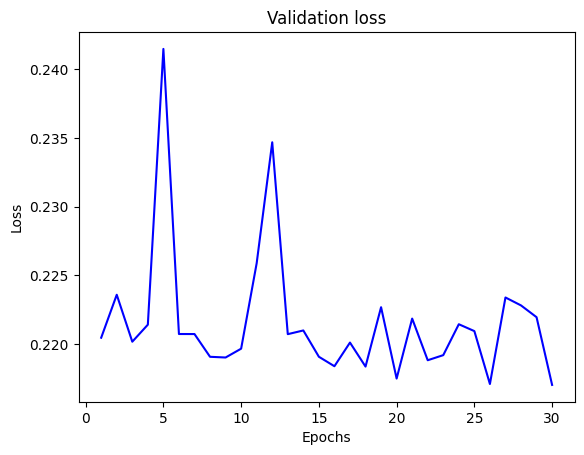

In [13]:
import matplotlib.pyplot as plt
val_loss = history.history["val_loss"]
epochs = range(1, len(val_loss) + 1)
plt.title("Validation loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()